## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化(應該是0~1, 歸一化)
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 262us/step - loss: 2.2860 - accuracy: 0.1342 - val_loss: 2.2464 - val_accuracy: 0.1684
Epoch 2/500
50000/50000 [==============================] - 13s 254us/step - loss: 2.2191 - accuracy: 0.1960 - val_loss: 2.1932 - val_accuracy: 0.2153
Epoch 3/500
50000/50000 [==============================] - 13s 270us/step - loss: 2.1709 - accuracy: 0.2265 - val_loss: 2.1514 - val_accuracy: 0.2414
Epoch 4/500
50000/50000 [==============================] - 12s 246us/step - loss: 2.1323 - accuracy: 0.2468 - val_loss: 2.1158 - val_accuracy: 0.2556
Epoch 5/500
50000/50000 [==============================] - 13s 265us/step - loss: 2.0984 - accuracy: 0.2624 - val_loss: 2.0837 - val_accuracy: 0.2641
Epoch 6/500
50000/50000 [==============================] - 11s 228us/step - loss: 2.0673 - accuracy: 0.2732 - val_loss: 2.0542 - val_accuracy: 0.2781
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.6594 - accuracy: 0.4182 - val_loss: 1.6664 - val_accuracy: 0.4172
Epoch 56/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.6558 - accuracy: 0.4173 - val_loss: 1.6597 - val_accuracy: 0.4198
Epoch 57/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.6516 - accuracy: 0.4197 - val_loss: 1.6634 - val_accuracy: 0.4116
Epoch 58/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.6480 - accuracy: 0.4204 - val_loss: 1.6555 - val_accuracy: 0.4190
Epoch 59/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.6448 - accuracy: 0.4228 - val_loss: 1.6503 - val_accuracy: 0.4195
Epoch 60/500
50000/50000 [==============================] - 13s 268us/step - loss: 1.6409 - accuracy: 0.4221 - val_loss: 1.6457 - val_accuracy: 0.4214
Epoch 61/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.6375 - ac

Epoch 109/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.5085 - accuracy: 0.4693 - val_loss: 1.5361 - val_accuracy: 0.4622
Epoch 110/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.5067 - accuracy: 0.4701 - val_loss: 1.5445 - val_accuracy: 0.4548
Epoch 111/500
50000/50000 [==============================] - 13s 263us/step - loss: 1.5049 - accuracy: 0.4706 - val_loss: 1.5314 - val_accuracy: 0.4609
Epoch 112/500
50000/50000 [==============================] - 13s 268us/step - loss: 1.5026 - accuracy: 0.4711 - val_loss: 1.5415 - val_accuracy: 0.4602
Epoch 113/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.5005 - accuracy: 0.4731 - val_loss: 1.5408 - val_accuracy: 0.4584
Epoch 114/500
50000/50000 [==============================] - 13s 262us/step - loss: 1.4977 - accuracy: 0.4730 - val_loss: 1.5275 - val_accuracy: 0.4620
Epoch 115/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.49

50000/50000 [==============================] - 13s 269us/step - loss: 1.4069 - accuracy: 0.5035 - val_loss: 1.4673 - val_accuracy: 0.4802
Epoch 163/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.4048 - accuracy: 0.5062 - val_loss: 1.4623 - val_accuracy: 0.4778
Epoch 164/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.4030 - accuracy: 0.5077 - val_loss: 1.4699 - val_accuracy: 0.4782
Epoch 165/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.4013 - accuracy: 0.5056 - val_loss: 1.4720 - val_accuracy: 0.4724
Epoch 166/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.3991 - accuracy: 0.5084 - val_loss: 1.4769 - val_accuracy: 0.4768
Epoch 167/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.3982 - accuracy: 0.5086 - val_loss: 1.4786 - val_accuracy: 0.4739
Epoch 168/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.3960 - accuracy:

Epoch 216/500
50000/50000 [==============================] - 13s 263us/step - loss: 1.3206 - accuracy: 0.5356 - val_loss: 1.4152 - val_accuracy: 0.4952
Epoch 217/500
50000/50000 [==============================] - 14s 271us/step - loss: 1.3177 - accuracy: 0.5355 - val_loss: 1.4412 - val_accuracy: 0.4830
Epoch 218/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.3175 - accuracy: 0.5354 - val_loss: 1.4466 - val_accuracy: 0.4900
Epoch 219/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.3164 - accuracy: 0.5363 - val_loss: 1.4397 - val_accuracy: 0.4910
Epoch 220/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.3147 - accuracy: 0.5369 - val_loss: 1.4619 - val_accuracy: 0.4756
Epoch 221/500
50000/50000 [==============================] - 13s 253us/step - loss: 1.3128 - accuracy: 0.5378 - val_loss: 1.4196 - val_accuracy: 0.4967
Epoch 222/500
50000/50000 [==============================] - 12s 242us/step - loss: 1.31

Epoch 270/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.2436 - accuracy: 0.5624 - val_loss: 1.4367 - val_accuracy: 0.4920
Epoch 271/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2427 - accuracy: 0.5639 - val_loss: 1.4013 - val_accuracy: 0.5084
Epoch 272/500
50000/50000 [==============================] - 11s 226us/step - loss: 1.2408 - accuracy: 0.5634 - val_loss: 1.4482 - val_accuracy: 0.4906
Epoch 273/500
50000/50000 [==============================] - 11s 224us/step - loss: 1.2398 - accuracy: 0.5644 - val_loss: 1.3780 - val_accuracy: 0.5127
Epoch 274/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.2389 - accuracy: 0.5640 - val_loss: 1.3752 - val_accuracy: 0.5147
Epoch 275/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.2397 - accuracy: 0.5626 - val_loss: 1.3891 - val_accuracy: 0.5065
Epoch 276/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.23

Epoch 324/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.1737 - accuracy: 0.5863 - val_loss: 1.4316 - val_accuracy: 0.5006
Epoch 325/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.1741 - accuracy: 0.5867 - val_loss: 1.3880 - val_accuracy: 0.5117
Epoch 326/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.1709 - accuracy: 0.5863 - val_loss: 1.3830 - val_accuracy: 0.5167
Epoch 327/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.1708 - accuracy: 0.5887 - val_loss: 1.4757 - val_accuracy: 0.4772
Epoch 328/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.1719 - accuracy: 0.5867 - val_loss: 1.4032 - val_accuracy: 0.5055
Epoch 329/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.1697 - accuracy: 0.5863 - val_loss: 1.3559 - val_accuracy: 0.5234
Epoch 330/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.17

50000/50000 [==============================] - 8s 154us/step - loss: 1.1103 - accuracy: 0.6095 - val_loss: 1.3580 - val_accuracy: 0.5201
Epoch 379/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.1082 - accuracy: 0.6085 - val_loss: 1.3906 - val_accuracy: 0.5093
Epoch 380/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.1016 - accuracy: 0.6115 - val_loss: 1.4401 - val_accuracy: 0.4966
Epoch 381/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.1042 - accuracy: 0.6109 - val_loss: 1.4101 - val_accuracy: 0.5061
Epoch 382/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.0980 - accuracy: 0.6156 - val_loss: 1.5112 - val_accuracy: 0.4811
Epoch 383/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.0975 - accuracy: 0.6126 - val_loss: 1.4957 - val_accuracy: 0.4810
Epoch 384/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.1039 - accuracy: 0.6122

50000/50000 [==============================] - 7s 148us/step - loss: 1.0389 - accuracy: 0.6327 - val_loss: 1.4059 - val_accuracy: 0.5104
Epoch 433/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.0431 - accuracy: 0.6318 - val_loss: 1.4238 - val_accuracy: 0.5081
Epoch 434/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.0430 - accuracy: 0.6331 - val_loss: 1.4239 - val_accuracy: 0.5052
Epoch 435/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.0387 - accuracy: 0.6338 - val_loss: 1.3794 - val_accuracy: 0.5209
Epoch 436/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.0380 - accuracy: 0.6336 - val_loss: 1.3871 - val_accuracy: 0.5147
Epoch 437/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.0348 - accuracy: 0.6356 - val_loss: 1.3892 - val_accuracy: 0.5232
Epoch 438/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.0395 - accuracy: 0.6313

50000/50000 [==============================] - 7s 147us/step - loss: 0.9758 - accuracy: 0.6563 - val_loss: 1.4488 - val_accuracy: 0.5062
Epoch 487/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.9835 - accuracy: 0.6529 - val_loss: 1.4213 - val_accuracy: 0.5144
Epoch 488/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.9841 - accuracy: 0.6528 - val_loss: 1.4229 - val_accuracy: 0.5134
Epoch 489/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.9802 - accuracy: 0.6531 - val_loss: 1.4799 - val_accuracy: 0.5010
Epoch 490/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.9889 - accuracy: 0.6503 - val_loss: 1.3587 - val_accuracy: 0.5300
Epoch 491/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.9730 - accuracy: 0.6559 - val_loss: 1.4507 - val_accuracy: 0.5032
Epoch 492/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.9782 - accuracy: 0.6558

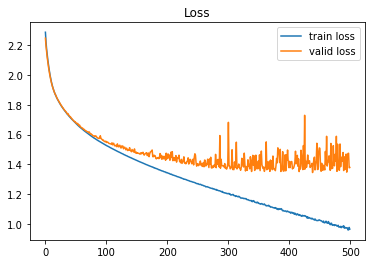

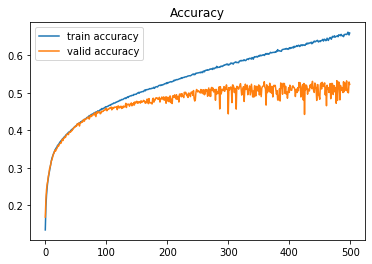

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺化方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()